In [12]:
from qiskit import *
from qiskit.providers.aer import noise
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer.noise import NoiseModel

In [13]:
noiseC = noise.NoiseModel()
noiseC.add_all_qubit_quantum_error(noise.pauli_error([('X', 0.01), ('Y', 0.01), ('Z', 0.01), ('I', 0.97)]), ['id'])

In [14]:
basis_gates = noiseC.basis_gates

In [15]:
circuit = QuantumCircuit(2, 2)
for i in range(10):
    circuit.id([0, 1])
circuit.barrier()
circuit.measure(1, 1)
circuit.measure(0, 0)

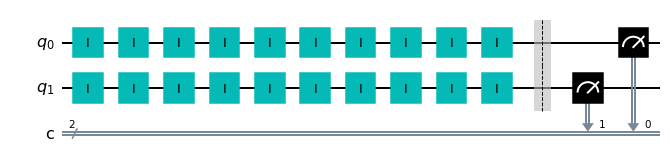

In [16]:
circuit.draw(output='mpl')

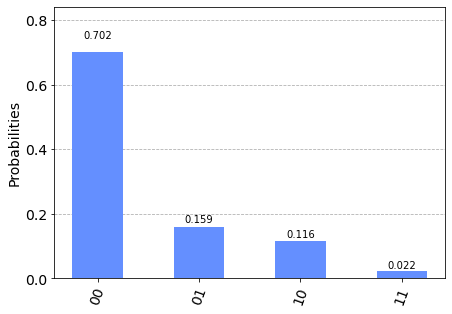

In [17]:
result = execute(circuit, Aer.get_backend('qasm_simulator'), 
                basis_gates = basis_gates, 
                noise_model = noiseC).result()
plot_histogram(result.get_counts(circuit))

In [11]:
print(noiseC.to_dict())

{'errors': [{'type': 'qerror', 'operations': ['id'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.01, 0.01, 0.01, 0.97]}], 'x90_gates': []}


In [ ]:
{
    'errors': [
        {
            'type': 'qerror', 'operations': ['id'], 'instructions': [
                [{'name': 'x', 'qubits': [0]}], 
                [{'name': 'y', 'qubits': [0]}],
                [{'name': 'z', 'qubits': [0]}], 
                [{'name': 'id', 'qubits': [0]}]
            ], 'probabilities': [0.01, 0.01, 0.01, 0.97]
        }
    ]
    , 'x90_gates': []
}
